# Tutorial Exercise: Yelp reviews

## Introduction

This exercise uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- **`yelp.csv`** contains the dataset. It is stored in the repository (in the **`data`** directory), so there is no need to download anything from the Kaggle website.
- Each observation (row) in this dataset is a review of a particular business by a particular user.
- The **stars** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The **text** column is the text of the review.

**Goal:** Predict the star rating of a review using **only** the review text.

**Tip:** After each task, I recommend that you check the shape and the contents of your objects, to confirm that they match your expectations.

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

## Task 1

Read **`yelp.csv`** into a pandas DataFrame and examine it.

In [6]:
df = pd.read_csv('data/yelp.csv')

In [7]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 2

Create a new DataFrame that only contains the **5-star** and **1-star** reviews.

- **Hint:** [How do I apply multiple filter criteria to a pandas DataFrame?](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb#9.-How-do-I-apply-multiple-filter-criteria-to-a-pandas-DataFrame%3F-%28video%29) explains how to do this.

In [15]:
df_sub = df[(df.stars == 1) | (df.stars == 5)]
df_sub.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

## Task 3

Define X and y from the new DataFrame, and then split X and y into training and testing sets, using the **review text** as the only feature and the **star rating** as the response.

- **Hint:** Keep in mind that X should be a pandas Series (not a DataFrame), since we will pass it to CountVectorizer in the task that follows.

In [16]:
X = df_sub.text
y = df_sub.stars

In [17]:
X.shape, y.shape

((4086,), (4086,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

## Task 4

Use CountVectorizer to create **document-term matrices** from X_train and X_test.

In [21]:
count_vectorizer = CountVectorizer()

In [26]:
X_train_vect = count_vectorizer.fit_transform(X_train)
X_test_vect = count_vectorizer.transform(X_test)

## Task 5

Use multinomial Naive Bayes to **predict the star rating** for the reviews in the testing set, and then **calculate the accuracy** and **print the confusion matrix**.

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to interpret both classification accuracy and the confusion matrix.

In [25]:
nb = MultinomialNB()

In [27]:
nb.fit(X_train_vect, y_train)

MultinomialNB()

In [31]:
y_pred = nb.predict(X_test_vect)

In [32]:
accuracy_score(y_test, y_pred)

0.9216965742251223

In [49]:
print(confusion_matrix(y_test, y_pred, labels=[1,5]))

[[163  81]
 [ 15 967]]


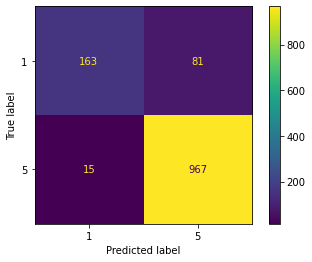

In [35]:
plot_confusion_matrix(nb, X_test_vect, y_test)

### Analysis
- Let's call "1" the negative class and "5" the positive.
- We have 81 false positives (1s that got predicted as 5s)
- We have 15 false negatives (5s that got predicted as 1s)

Accuracy is 0.92
Recall (or "Sensitivity"): number of true positives over all actual positives: 967/(967+15) = 0.98
Precision: number of true positives over all predicted positives: 967/(967+81) = 0.92


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.67      0.77       244
           5       0.92      0.98      0.95       982

    accuracy                           0.92      1226
   macro avg       0.92      0.83      0.86      1226
weighted avg       0.92      0.92      0.92      1226



## Task 6 (Challenge)

Calculate the **null accuracy**, which is the classification accuracy that could be achieved by always predicting the most frequent class.

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains null accuracy and demonstrates two ways to calculate it, though only one of those ways will work in this case. Alternatively, you can come up with your own method to calculate null accuracy!

In [48]:
# first look at class distribution of test set
y_test.value_counts(normalize=True)

5    0.800979
1    0.199021
Name: stars, dtype: float64

We have a clear predominance of 5-star reviews: 80% 5, 20% 1.

The **null accuracy** is simply the percentage of the biggest class = 80%. This is the accuracy we would get if we simply predict all values as the largest class.

## Task 7 (Challenge)

Browse through the review text of some of the **false positives** and **false negatives**. Based on your knowledge of how Naive Bayes works, do you have any ideas about why the model is incorrectly classifying these reviews?

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains the definitions of "false positives" and "false negatives".
- **Hint:** Think about what a false positive means in this context, and what a false negative means in this context. What has scikit-learn defined as the "positive class"?

In [52]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [5 5 5 5 5 5 1 5 5 5 1 5 5 1 5 1 5 5 5 5 5 5 5 5 5]
Pred: [5 5 5 5 5 5 1 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5]


In [59]:
# this text was incorrectly classified as 5 star (false positive)
X_test.iloc[10]

"I enjoy falafels and my boyfriend really likes Gyros.  So, when we received a coupon for Daphne's Greek Café we were jazzed to go check it out.\n\nWhat I noticed right away is it has kind of a fast-food sort of feel to it and I thought, OK, its catering to people on their lunch breaks.  However, the food itself is like Greek fast food for people who have never had anywhere near really Greek food before and so they wouldn't know any better.\n\nThe plates are astatically pleasing with everything arranged nice and neat.  This amounted to zilch to me.  When I got to eat, I want plenty of food and I want quality as appropriately expected from the type of establishment I am eating at.  \n\nAt Daphne's you get a few little thin slices of what may or may not be real gyro meat.  The falafel meat is little over fried disks.  That's right disks.  Not balls of falafel meat where the outside is slightly crunchy and the inside is meaty and moist.  The pita bread is not.  It's just some flat bread c

This text contains a lot of positive words, entered sarcastically or negated later. 

This makes sense. It seems easier to predict positive reviews than to understand negation to correctly predict negative reviews. That's why the recall is higher when we choose 5-stars as our positive class and much lower if we choose 1-stars.

## Task 8 (Challenge)

Calculate which 10 tokens are the most predictive of **5-star reviews**, and which 10 tokens are the most predictive of **1-star reviews**.

- **Hint:** Naive Bayes automatically counts the number of times each token appears in each class, as well as the number of observations in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object.

In [60]:
nb.feature_count_

array([[24.,  3.,  1., ...,  0.,  0.,  0.],
       [32.,  9.,  0., ...,  1.,  1.,  1.]])

In [61]:
nb.class_count_

array([ 505., 2355.])

In [62]:
X_train_tokens = count_vectorizer.get_feature_names()

In [63]:
onestar_token_count = nb.feature_count_[0, :]
fivestar_token_count = nb.feature_count_[1, :]

In [65]:
tokens = pd.DataFrame({'token':X_train_tokens, '1_star':onestar_token_count, '5_star':fivestar_token_count}).set_index('token')
tokens.head()

,1_star,5_star
token,,
00,24.0,32.0
000,3.0,9.0
00a,1.0,0.0
00am,1.0,1.0
00pm,1.0,3.0


In [71]:
# examine 5 random DataFrame rows
tokens.sample(10)

,1_star,5_star
token,,
tiffanys,0.0,1.0
substitution,1.0,0.0
consigned,1.0,0.0
dart,0.0,1.0
yen,0.0,1.0
location,49.0,181.0
intend,2.0,3.0
70s,1.0,3.0
cpc,0.0,1.0


In [72]:
# add 1 to counts to avoid dividing by 0
tokens['1_star'] = tokens['1_star'] + 1
tokens['5_star'] = tokens['5_star'] + 1
tokens.sample(5, random_state=6)

,1_star,5_star
token,,
sigh,4.0,2.0
rig,1.0,3.0
others,9.0,60.0
smiley,1.0,5.0
apologize,3.0,3.0


In [73]:
# convert the ham and spam counts into frequencies
tokens['1_star'] = tokens['1_star'] / nb.class_count_[0]
tokens['5_star'] = tokens['5_star'] / nb.class_count_[1]
tokens.sample(5, random_state=6)

,1_star,5_star
token,,
sigh,0.007921,0.000849
rig,0.001980,0.001274
others,0.017822,0.025478
smiley,0.001980,0.002123
apologize,0.005941,0.001274


In [75]:
# calculate the ratio of spam-to-ham for each token
tokens['5star_ratio'] = tokens['5_star'] / tokens['1_star']
tokens.sample(5, random_state=6)

,1_star,5_star,spam_ratio,5star_ratio
token,,,,
sigh,0.007921,0.000849,0.107219,0.107219
rig,0.001980,0.001274,0.643312,0.643312
others,0.017822,0.025478,1.429582,1.429582
smiley,0.001980,0.002123,1.072187,1.072187
apologize,0.005941,0.001274,0.214437,0.214437


In [77]:
tokens.drop(columns=['spam_ratio'], inplace=True)

In [78]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('5star_ratio', ascending=False)

,1_star,5_star,5star_ratio
token,,,
fantastic,0.003960,0.077707,19.621019
yum,0.001980,0.025053,12.651805
perfect,0.007921,0.099788,12.598195
healthy,0.001980,0.024204,12.222930
heaven,0.001980,0.019533,9.864119
...,...,...,...
unprofessional,0.017822,0.000425,0.023826
horrible,0.154455,0.003397,0.021994
flavorless,0.019802,0.000425,0.021444


## Task 9 (Challenge)

Up to this point, we have framed this as a **binary classification problem** by only considering the 5-star and 1-star reviews. Now, let's repeat the model building process using all reviews, which makes this a **5-class classification problem**.

Here are the steps:

- Define X and y using the original DataFrame. (y should contain 5 different classes.)
- Split X and y into training and testing sets.
- Create document-term matrices using CountVectorizer.
- Calculate the testing accuracy of a Multinomial Naive Bayes model.
- Compare the testing accuracy with the null accuracy, and comment on the results.
- Print the confusion matrix, and comment on the results. (This [Stack Overflow answer](http://stackoverflow.com/a/30748053/1636598) explains how to read a multi-class confusion matrix.)
- Print the [classification report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), and comment on the results. If you are unfamiliar with the terminology it uses, research the terms, and then try to figure out how to calculate these metrics manually from the confusion matrix!